In [2]:
#Artigos publicados pelo ITA de 2011 a 2019
#260 document results
#AF-ID ( "Instituto Tecnologico de Aeronautica"   60021657 )  AND  SUBJAREA ( engi )  AND  ( LIMIT-TO ( PUBYEAR ,  2019 )  OR  LIMIT-TO ( PUBYEAR ,  2018 )  OR  LIMIT-TO ( PUBYEAR ,  2017 )  OR  LIMIT-TO ( PUBYEAR ,  2016 )  OR  LIMIT-TO ( PUBYEAR ,  2015 )  OR  LIMIT-TO ( PUBYEAR ,  2014 )  OR  LIMIT-TO ( PUBYEAR ,  2013 )  OR  LIMIT-TO ( PUBYEAR ,  2012 )  OR  LIMIT-TO ( PUBYEAR ,  2011 ) ) 
#Adaptado de https://www.kaggle.com/ajaymanwani/hottest-topics-in-machine-learning-using-nips-data

# Importing modules
import pandas as pd
import os



## Carregando os artigos

In [3]:

# Read datasets/papers.csv into papers
papers = pd.read_csv('scopus_ITA_2011_2019_qtd1899.csv')
# Print out the first rows of papers
print(papers.head())

                                             Authors  ...                 EID
0  Abuabara L., Paucar-Caceres A., Burrowes-Cromw...  ...  2-s2.0-85068048870
1  Cardoso-Ribeiro F.L., Brugnoli A., Matignon D....  ...  2-s2.0-85082438607
2  Adriano De Melo G., Sugimoto D.N., Tasinaffo P...  ...  2-s2.0-85081607999
3           Cerqueira C.S., Ambrosio A.M., Kirner C.  ...  2-s2.0-85075568880
4  Junqueira-Junior C., Azevedo J.L.F., Panetta J...  ...  2-s2.0-85074839022

[5 rows x 24 columns]


In [4]:
papers.columns

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Document Type',
       'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')

## Preparando os dados para análise

In [5]:
# Remove the columns
papers.drop(['Authors', 'Author(s) ID','Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Publication Stage', 'Open Access', 'EID'], axis=1, inplace=True)

# Print out the first rows of papers
papers.head()

,Title,Year,Source title,Abstract,Author Keywords,Index Keywords,Document Type,Source
0,Consumers’ values and behaviour in the Brazili...,2019,International Journal of Production Research,"Coffee consumption is changing. Monodose, flav...",analytic hierarchy process; Brazil coffee- in-...,Analytic hierarchy process; Decision making; S...,Article,Scopus
1,"Port-Hamiltonian modeling, discretization and ...",2019,Proceedings of the IEEE Conference on Decision...,This work presents the development of the nonl...,NaN,Control nonlinearities; Discrete event simulat...,Conference Paper,Scopus
2,A new approach to river flow forecasting: LSTM...,2019,IEEE Latin America Transactions,Hydroelectric power stations are responsible f...,artificial neural networks; gated recurrent un...,Brain; Environmental impact; Hydroelectric pow...,Article,Scopus
3,Tangible user interface vocabulary to physical...,2019,Concurrent Engineering Research and Applications,Tangible user interface brings back physical c...,concurrent engineering collaboration; interact...,Computer software; Concurrent engineering; Sys...,Article,Scopus
4,Strong scaling of numerical solver for superso...,2019,Journal of the Brazilian Society of Mechanical...,Acoustics loads are rocket design constraints ...,Computational fluid dynamics; Large eddy simul...,Computational aeroacoustics; Computational flu...,Article,Scopus


## Plotar como a pesquisa em Engenharia evoluiu de 2011 a 2019 

In [6]:
papers.columns

Index(['Title', 'Year', 'Source title', 'Abstract', 'Author Keywords',
       'Index Keywords', 'Document Type', 'Source'],
      dtype='object')

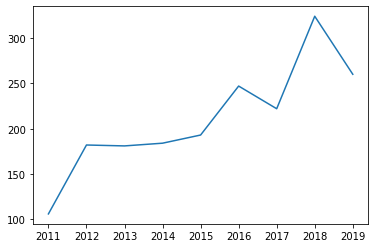

In [7]:
# Group the papers by year
groups = papers.groupby(['Year'])

# Determine the size of each group
counts = groups.size()

# Visualise the counts as a bar plot
import matplotlib.pyplot
%matplotlib inline
matplotlib.pyplot.plot(counts)

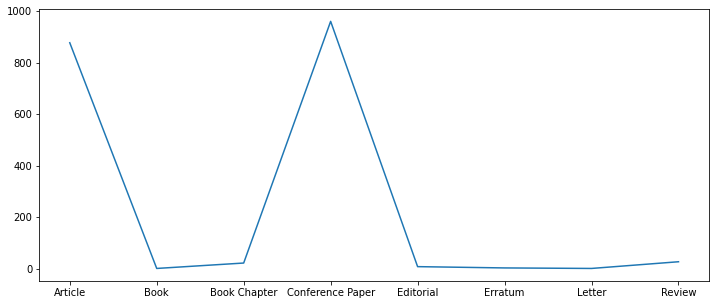

In [8]:
# Group the papers by year
groups = papers.groupby(['Document Type'])

# Determine the size of each group
counts = groups.size()

# Visualise the counts as a bar plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,5))
plt.plot(counts) ## This is your plot
plt.show()


In [17]:
# Group the papers by source
groups = papers.groupby(['Source title']).size()
sorted_groups = groups.sort_values(ascending=False).head(10)

sorted_groups

groups

Source title
10th Annual International Systems Conference, SysCon 2016 - Proceedings                                                                                                                            3
11th AIAA Aviation Technology, Integration,and Operations (ATIO) Conference, including the AIAA Balloon Systems Conference and 19th AIAA Lighter-Than-Air Technology Conference                    1
11th Annual IEEE International Systems Conference, SysCon 2017 - Proceedings                                                                                                                       2
11th International Symposium on Turbulence and Shear Flow Phenomena, TSFP 2019                                                                                                                     1
11th World Congress on Computational Mechanics, WCCM 2014, 5th European Conference on Computational Mechanics, ECCM 2014 and 6th European Conference on Computational Fluid Dynamics, ECFD 2014    1
  

## Pre-processamento do titulos de cada artigo

In [10]:
# Load the regular expression library
import re

# Print the titles of the first rows 
print(papers['Title'].head())

# Remove punctuation
papers['title_processed'] = papers['Title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].map(lambda x: x.lower())

# Print the processed titles of the first rows 
print(papers.head())

0    Consumers’ values and behaviour in the Brazili...
1    Port-Hamiltonian modeling, discretization and ...
2    A new approach to river flow forecasting: LSTM...
3    Tangible user interface vocabulary to physical...
4    Strong scaling of numerical solver for superso...
Name: Title, dtype: object
                                               Title  ...                                    title_processed
0  Consumers’ values and behaviour in the Brazili...  ...  consumers’ values and behaviour in the brazili...
1  Port-Hamiltonian modeling, discretization and ...  ...  port-hamiltonian modeling discretization and f...
2  A new approach to river flow forecasting: LSTM...  ...  a new approach to river flow forecasting: lstm...
3  Tangible user interface vocabulary to physical...  ...  tangible user interface vocabulary to physical...
4  Strong scaling of numerical solver for superso...  ...  strong scaling of numerical solver for superso...

[5 rows x 9 columns]


In [11]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Nuvem de palavras das pesquisas

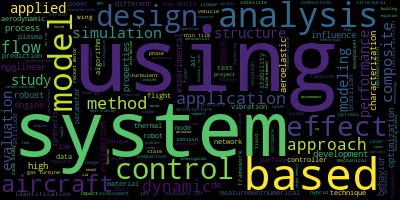

In [12]:
# Import the wordcloud library
import wordcloud

stop = set(stopwords.words('english'))

# Join the different processed titles together.
long_string = ' '.join(papers['title_processed'])

# Create a WordCloud object
wordcloud = wordcloud.WordCloud(stopwords=stop)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Preparar o texto para a análise via LDA - Tópicos

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


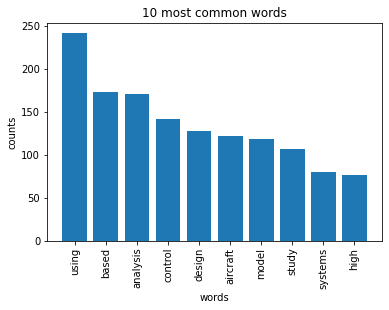

In [13]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## Analisar as tendencias com LDA

In [29]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
control based design using model flight analysis management implementation development

Topic #1:
using composite study analysis jet control turbulent design optimization plasma

Topic #2:
structures model systems coherent shape control based wave edge review

Topic #3:
using based aircraft control design networks systems analysis prediction composite

Topic #4:
films study high earth development wind characterization properties 3d influence

Topic #5:
analysis based microstrip using cylindrical model systems antennas buckling technique

Topic #6:
using model time aircraft method transfer based simulation heat systems

Topic #7:
control analysis aircraft flexible stability dynamics experimental based using measurements

Topic #8:
state using asynchronous model non hybrid design modeling approach mode

Topic #9:
gas performance turbine flows approach based evaluation pressure high design


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# ***Análise*** a partir das revistas em que os artigos foram publicados***

## Pre-processamento do nome das revistas de cada artigo

In [31]:
# Load the regular expression library
import re

# Print the titles of the first rows 
print(papers['Source title'].head())

papers.dropna(subset = ["Source title"], inplace=True)

# Remove punctuation
papers['title_processed'] = papers['Source title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].map(lambda x: x.lower())

# Print the processed titles of the first rows 
print(papers.head())

0         International Journal of Production Research
1    Proceedings of the IEEE Conference on Decision...
2                      IEEE Latin America Transactions
3     Concurrent Engineering Research and Applications
4    Journal of the Brazilian Society of Mechanical...
Name: Source title, dtype: object
                                               Title  ...                                    title_processed
0  Consumers’ values and behaviour in the Brazili...  ...       international journal of production research
1  Port-Hamiltonian modeling, discretization and ...  ...  proceedings of the ieee conference on decision...
2  A new approach to river flow forecasting: LSTM...  ...                    ieee latin america transactions
3  Tangible user interface vocabulary to physical...  ...   concurrent engineering research and applications
4  Strong scaling of numerical solver for superso...  ...  journal of the brazilian society of mechanical...

[5 rows x 9 columns]


## Nuvem de palavras sobre as revistas

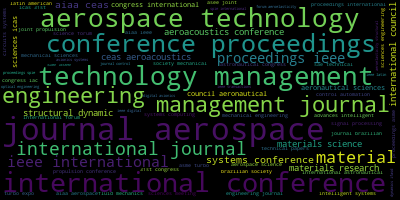

In [32]:
# Import the wordcloud library
import wordcloud

stop = set(stopwords.words('english'))

# Join the different processed titles together.
long_string = ' '.join(papers['title_processed'])

# Create a WordCloud object
wordcloud = wordcloud.WordCloud(stopwords=stop)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Preparar o nome das revistas para análise via LDA

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


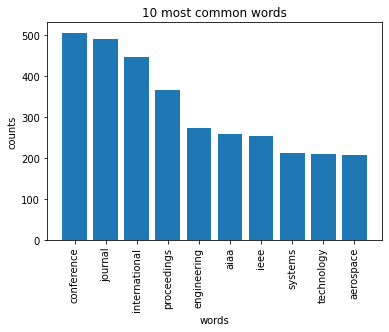

In [33]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## Analisar Tendencias de revistas com LDA

In [34]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
ieee conference transactions aiaa latin symposium joint propulsion systems technology

Topic #1:
mechanics applied control 2016 transactions conference wseas asme 2013 automation

Topic #2:
materials journal science research structures european forum composite systems physical

Topic #3:
aiaa forum 2019 journal dynamics fluid international aerospace meeting sciences

Topic #4:
conference proceedings international ieee aiaa systems engineering 2014 aeroacoustics ceas

Topic #5:
engineering proceedings international conference electronics computing ieee 2018 2017 electrical

Topic #6:
proceedings asme engineering expo turbo mechanical congress applied materials research

Topic #7:
journal aerospace technology management systems engineering society mechanical sciences intelligent

Topic #8:
international congress sciences aeronautical council icas 2018 31st proceedings journal

Topic #9:
2012 technical papers sae structures control journal american space l

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
